In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode

In [2]:
# plotly config
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# importing the dataset
df = pd.read_csv("./data/master.csv")
print(df.shape)
df.head()

(27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Dealing with Missing Values

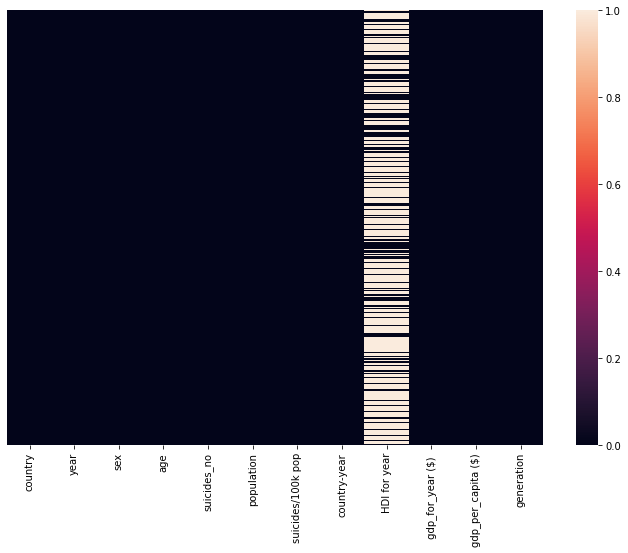

In [4]:
# Dropping HDI for year because it has too much missing values
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(),yticklabels=0)
plt.show()
df.drop(['HDI for year'],axis=1,inplace=True,)

## Deaths Per Year ( Country Comparison )

In [5]:
# data preparation and pre-processing
country_list = list(df['country'].drop_duplicates())
year_list = list(df['year'].drop_duplicates())
country = []
year = []
no_of_suicides = []
for countryname in country_list:
    for yearname in year_list:
        country.append(countryname)
        year.append(yearname)
        try:
            no_of_suicides.append(df.groupby(['country','year']).get_group((countryname,yearname))['suicides_no'].sum())
        except:
            no_of_suicides.append(0)
            
# convertion to dataframe
df1 = pd.DataFrame({
    'Country':country,
    'Year':year,
    'No_of_Suicides':no_of_suicides
})

# plot
fig = px.scatter(df1,x='Country',y='No_of_Suicides',animation_frame='Year',size='No_of_Suicides',color='Country')
fig.update_layout(
    xaxis={
        'showticklabels':False,
        'showgrid':False
    },
    title='Suicides Each Year Per Country',
    yaxis_title='Number of Suicides'
)

In [6]:
# total number of suicides over the years
year_list.sort()
deaths_per_year = []
for yearname in year_list:
    deaths_per_year.append(df.groupby('year').get_group(yearname)['suicides_no'].sum())

df2 = pd.DataFrame({
    'year':year_list,
    'deaths':deaths_per_year
})
fig = go.Figure()
fig.add_trace(go.Scatter(x=year_list,y=deaths_per_year,marker={'color':'red'},mode='lines+markers',hovertext=year_list,hoverinfo='text'))
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Suicides',
    title='Suicides over the Years',
)